# Tarefa Grupo : Previsão de salários de *hitters* (Major League Baseball)
Decisão e Aprendizagem Automática

[Link do Dataset](https://www.kaggle.com/datasets/thedevastator/uncovering-the-most-cost-effective-mlb-hitters-o)

Nesta secção explicar as colunas que existem 
o objetivo do dataset
o porque de escolhermos este dataset
outras caracteristicas que achemos importantes

escolhemos dataset para um problema de regressao porque o outro e` classificacao

COMPLETAR ISTO !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Em cada uma das seccoes escrever a conclusao ao final daquela iterecao

#### Importação das bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


#### Ingestão de dados

In [2]:
df = pd.read_csv("./MLB Stats.csv",na_filter=False) # ver aquela cena do none as false 

#### Visualização dos dados

In [3]:
df.head()

,index,playerID,Player Name,weight,height,bats,throws,Season,League,teamID,...,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA
0,0,aardsda01,David Aardsma,215,75,R,R,2004,NL,SFN,...,0,0,0,0,300000,0,0,0,0,0
1,1,aardsda01,David Aardsma,215,75,R,R,2007,AL,CHA,...,0,0,0,0,387500,0,0,0,0,0
2,2,aardsda01,David Aardsma,215,75,R,R,2008,AL,BOS,...,0,0,0,1,403250,0,0,0,0,1
3,3,aardsda01,David Aardsma,215,75,R,R,2009,AL,SEA,...,0,0,0,0,419000,0,0,0,0,0
4,4,aardsda01,David Aardsma,215,75,R,R,2012,AL,NYA,...,0,0,0,0,500000,0,0,0,0,0


In [4]:
df.tail()

,index,playerID,Player Name,weight,height,bats,throws,Season,League,teamID,...,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA
28288,28288,zupcibo01,Bob Zupcic,220,76,R,R,1991,AL,BOS,...,3,0,1,6,100000,0,0,1,0,27
28289,28289,zupcibo01,Bob Zupcic,220,76,R,R,1992,AL,BOS,...,43,2,25,60,109000,1,4,7,4,433
28290,28290,zupcibo01,Bob Zupcic,220,76,R,R,1993,AL,BOS,...,26,5,27,54,222000,2,2,8,3,328
28291,28291,zuvelpa01,Paul Zuvella,173,72,R,R,1989,AL,CLE,...,6,0,1,11,145000,0,1,0,0,60
28292,28292,zychto01,Tony Zych,190,75,R,R,2016,AL,SEA,...,0,0,0,0,511000,0,0,0,0,0


In [5]:
df.columns

Index(['index', 'playerID', 'Player Name', 'weight', 'height', 'bats',
       'throws', 'Season', 'League', 'teamID', 'Team', 'Franchise', 'G', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'BB', 'SO', 'salary', 'IBB',
       'HBP', 'SH', 'SF', 'PA'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28293 entries, 0 to 28292
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        28293 non-null  int64 
 1   playerID     28293 non-null  object
 2   Player Name  28293 non-null  object
 3   weight       28293 non-null  int64 
 4   height       28293 non-null  int64 
 5   bats         28293 non-null  object
 6   throws       28293 non-null  object
 7   Season       28293 non-null  int64 
 8   League       28293 non-null  object
 9   teamID       28293 non-null  object
 10  Team         28293 non-null  object
 11  Franchise    28293 non-null  object
 12  G            28293 non-null  int64 
 13  AB           28293 non-null  int64 
 14  R            28293 non-null  int64 
 15  H            28293 non-null  int64 
 16  2B           28293 non-null  int64 
 17  3B           28293 non-null  int64 
 18  HR           28293 non-null  int64 
 19  RBI          28293 non-nu

In [7]:

df.describe()

,index,weight,height,Season,G,AB,R,H,2B,3B,...,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA
count,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,...,28293.000000,28293.000000,28293.000000,28293.000000,2.829300e+04,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000
mean,14146.000000,199.049305,73.500194,2000.938183,63.933871,161.879900,21.786838,42.624536,8.220655,0.909165,...,20.783763,3.107518,15.801718,30.376241,2.112965e+06,1.326052,1.450642,1.534549,1.366911,183.359771
std,8167.629919,22.653983,2.286595,8.900551,47.285257,199.406647,30.133899,56.200911,11.401446,1.832408,...,29.704822,7.494805,23.036362,37.624155,3.440239e+06,3.160607,2.782354,2.748349,2.207801,226.217383
min,0.000000,140.000000,66.000000,1985.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.090000e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7073.000000,185.000000,72.000000,1994.000000,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000e+05,0.000000,0.000000,0.000000,0.000000,1.000000
50%,14146.000000,195.000000,74.000000,2001.000000,50.000000,57.000000,4.000000,10.000000,2.000000,0.000000,...,4.000000,0.000000,3.000000,15.000000,6.000000e+05,0.000000,0.000000,0.000000,0.000000,66.000000
75%,21219.000000,215.000000,75.000000,2009.000000,101.000000,298.000000,37.000000,76.000000,14.000000,1.000000,...,34.000000,2.000000,25.000000,50.000000,2.425000e+06,1.000000,2.000000,2.000000,2.000000,337.000000
max,28292.000000,315.000000,83.000000,2016.000000,163.000000,716.000000,152.000000,262.000000,59.000000,23.000000,...,165.000000,110.000000,232.000000,223.000000,3.300000e+07,120.000000,35.000000,39.000000,17.000000,783.000000


In [8]:
df.isnull().sum()

index          0
playerID       0
Player Name    0
weight         0
height         0
bats           0
throws         0
Season         0
League         0
teamID         0
Team           0
Franchise      0
G              0
AB             0
R              0
H              0
2B             0
3B             0
HR             0
RBI            0
SB             0
BB             0
SO             0
salary         0
IBB            0
HBP            0
SH             0
SF             0
PA             0
dtype: int64

In [9]:
df_int = df.select_dtypes(include=['int'])
df_int.corr()

,index,weight,height,Season,G,AB,R,H,2B,3B,...,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA
index,1.000000,0.003273,0.023527,-0.006026,-0.027936,-0.032677,-0.032153,-0.031964,-0.032039,-0.029558,...,-0.031009,-0.023791,-0.025974,-0.029902,0.020471,-0.024083,-0.029704,-0.007019,-0.036565,-0.032593
weight,0.003273,1.000000,0.539801,0.424305,-0.080874,-0.089453,-0.082409,-0.088201,-0.047991,-0.167602,...,-0.004831,-0.188545,-0.053066,0.019234,0.199390,0.015383,-0.000076,-0.171095,-0.053696,-0.086644
height,0.023527,0.539801,1.000000,0.053006,-0.226921,-0.247089,-0.224280,-0.238658,-0.207761,-0.239918,...,-0.146632,-0.244606,-0.183132,-0.148450,0.074569,-0.059576,-0.169205,-0.171330,-0.168878,-0.243096
Season,-0.006026,0.424305,0.053006,1.000000,-0.000024,-0.006963,-0.009216,-0.009511,0.020309,-0.037861,...,-0.005310,-0.054530,-0.024156,0.068342,0.360058,-0.053137,0.078766,-0.069433,-0.029906,-0.009507
G,-0.027936,-0.080874,-0.226921,-0.000024,1.000000,0.925185,0.890184,0.913764,0.877293,0.616526,...,0.863851,0.540927,0.829148,0.838210,0.161444,0.565503,0.615681,0.219020,0.749810,0.925421
AB,-0.032677,-0.089453,-0.247089,-0.006963,0.925185,1.000000,0.964169,0.990083,0.949833,0.667282,...,0.932611,0.594885,0.879662,0.902060,0.208777,0.594423,0.662064,0.254001,0.807163,0.998472
R,-0.032153,-0.082409,-0.224280,-0.009216,0.890184,0.964169,1.000000,0.973927,0.940240,0.676805,...,0.940211,0.635824,0.913207,0.876136,0.227782,0.620724,0.670292,0.198617,0.788262,0.969915
H,-0.031964,-0.088201,-0.238658,-0.009511,0.913764,0.990083,0.973927,1.000000,0.959691,0.673932,...,0.940241,0.603232,0.877870,0.869399,0.215163,0.613838,0.657334,0.222208,0.807441,0.989378
2B,-0.032039,-0.047991,-0.207761,0.020309,0.877293,0.949833,0.940240,0.959691,1.000000,0.608920,...,0.926061,0.527097,0.854106,0.851604,0.218769,0.603397,0.651481,0.169373,0.794655,0.950494
3B,-0.029558,-0.167602,-0.239918,-0.037861,0.616526,0.667282,0.676805,0.673932,0.608920,1.000000,...,0.553260,0.656541,0.550569,0.567397,0.043979,0.327102,0.403740,0.261907,0.486607,0.661730


<Axes: >

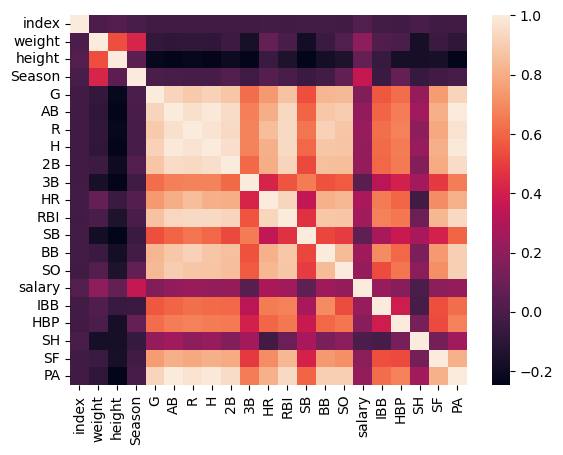

In [10]:
sns.heatmap(df_int.corr())

<Axes: >

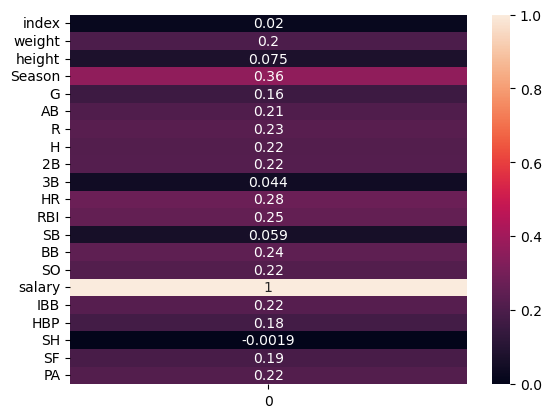

In [11]:
sns.heatmap(df_int.corrwith(df_int['salary']).to_frame(), annot=True)

<Axes: xlabel='salary', ylabel='Count'>

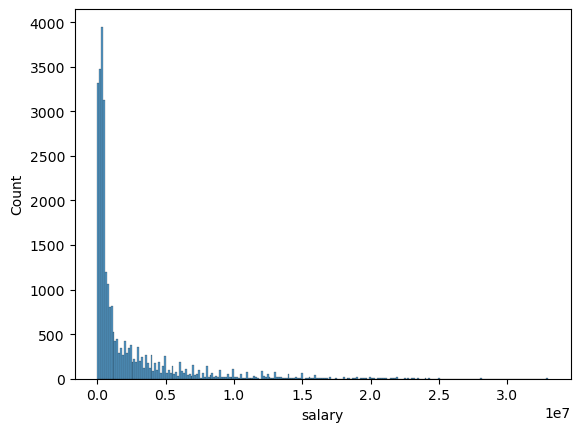

In [12]:
sns.histplot(df['salary'])

In [13]:
#sns.pairplot(df)

In [14]:
# verficiar duplicados
df.duplicated().sum()

0

In [15]:
df['salary'].value_counts(normalize=True) # com normalize é para ter percentagens

salary
109000     0.023822
200000     0.016506
500000     0.015446
1000000    0.014208
300000     0.012971
             ...   
2772500    0.000035
846667     0.000035
5792956    0.000035
4809159    0.000035
504100     0.000035
Name: proportion, Length: 3352, dtype: float64

In [16]:
df['salary'].describe()


count    2.829300e+04
mean     2.112965e+06
std      3.440239e+06
min      1.090000e+04
25%      3.000000e+05
50%      6.000000e+05
75%      2.425000e+06
max      3.300000e+07
Name: salary, dtype: float64

#### Tratamento de dados e Modelos

In [2]:
df['playerID']



NameError: name 'df' is not defined

In [18]:
# Nesta parte depois mudar vou fazer tratamento e iniciacao de um modelo

# mudar nome das equipas para numero




x = df_int.drop('salary',axis=1)

y = df['salary']

#print(y.head())

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

# regressao linear
ln = LinearRegression()

ln.fit(x_train,y_train)

#coeff_df = pd.DataFrame(ln.coef_,x.columns,columns=['Coefficient'])
#print(coeff_df)

print(ln.intercept_)

predictions = ln.predict(x_test)

#plt.scatter(y_test,predictions)
print()

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))



-306542481.7169748

MAE: 1921803.328078996
MSE: 8638694970687.966
RMSE: 2939165.69296254


In [19]:


# Regressao linear com label encoding !!!!!!!!!11
le = LabelEncoder()

"""
 1   playerID     28293 non-null  object
 2   Player Name  28293 non-null  object
 3   weight       28293 non-null  int64 
 4   height       28293 non-null  int64 
 5   bats         28293 non-null  object
 6   throws       28293 non-null  object
 7   Season       28293 non-null  int64 
 8   League       28293 non-null  object
 9   teamID       28293 non-null  object
 10  Team         28293 non-null  object
 11  Franchise    28293 non-null  object
"""


# Fit and transform the 'column_name' column
for col in ['bats','throws','teamID','League']:
    df[col] = le.fit_transform(df[col])


x = df.drop(['salary','playerID','Player Name','Franchise','Team'],axis=1)

#print(x.head)

y = df['salary']

#print(y.head())

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

# regressao linear
ln = LinearRegression()

ln.fit(x_train,y_train)

#coeff_df = pd.DataFrame(ln.coef_,x.columns,columns=['Coefficient'])
#print(coeff_df)

print(ln.intercept_)

predictions = ln.predict(x_test)

#plt.scatter(y_test,predictions)
print()

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

-307016505.92236423

MAE: 1920972.2204467459
MSE: 8636678876996.76
RMSE: 2938822.702545487


## NOTAS : 

1. USAR OUTRAS TECNICAS E EXPLORAR E TRATAR ISTO MELHOR

2. UTILIZAR OUTRO DATASET E FAZER OUTRA CENA IGUAL COM OUTRO DATASET ! 


POR MAIS GRAFICOS PL3 !!!!!!!!!!!!!!!! => Ver slides

Tratamento dos dados

Criação dos modelos